## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="6bEaeHY1YeWbQd7L6FEx")
project = rf.workspace("my-frist-project-ltwwa").project("rock-paper-scissors-presentation-uuikc")
version = project.version(1)
dataset = version.download("yolov8-obb")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rock-Paper-Scissors-Presentation-1 in yolov8-obb:: 100%|██████████| 480/480 [00:00<00:00, 7552.91it/s]


In [7]:
!pip install ultralytics roboflow

  Using cached ultralytics-8.3.229-py3-none-any.whl.metadata (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00


In [8]:
from ultralytics import YOLO

from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [9]:
# Simulan ang training gamit ang CLI command
!yolo task=obb mode=train model=yolo11n-obb.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Rock-Paper-Scissors-Presentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [10]:
# Mag-test sa isang random image mula sa test set
import glob
from IPython.display import Image, display

# Kumuha ng random na image sa test folder
import random
test_images = glob.glob(f"{dataset.location}/test/images/*")
random_image = random.choice(test_images)

print(f"Testing on: {random_image}")

# I-run ang prediction
!yolo task=obb mode=predict model=runs/obb/train/weights/best.pt source="{random_image}"

# Ipakita ang result (Check the path provided in the output logs, usually runs/obb/predict/...)
# Note: Minsan nag-iiba ang folder name (predict, predict2, etc.) kaya check mo ang output log.

Testing on: /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1626460213979_png_jpg.rf.2526f3ecb5d0c05fce4f828d5ed95ad5.jpg
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,654,308 parameters, 0 gradients, 6.6 GFLOPs

image 1/1 /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1626460213979_png_jpg.rf.2526f3ecb5d0c05fce4f828d5ed95ad5.jpg: 640x640 1 Scissors, 11.0ms
Speed: 3.8ms preprocess, 11.0ms inference, 82.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

Testing on: /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1624550293327_png_jpg.rf.ae371c60bf9b6f2f27a8ec720aaabe57.jpg

image 1/1 /content/Rock-Paper-Scissors-Presentation-1/test/images/egohands-public-1624550293327_png_jpg.rf.ae371c60bf9b6f2f27a8ec720aaabe57.jpg: 640x640 1 Scissors, 10.6ms
Speed: 3.9ms preprocess, 10.6ms inference, 83.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/obb/predict2


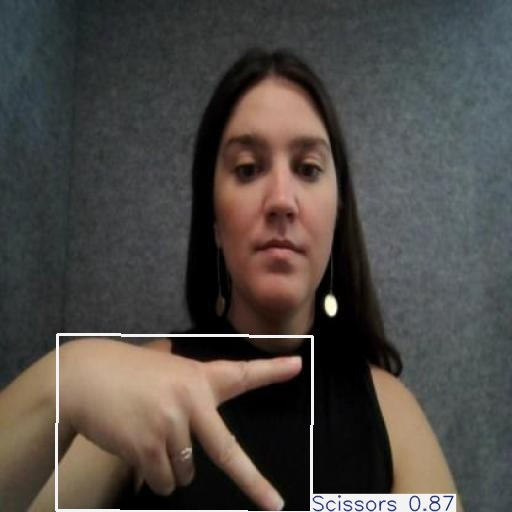

In [11]:
import os
from ultralytics import YOLO
from IPython.display import Image, display
import glob
import random

# 1. I-define ang HOME directory (para gumana yung f'{HOME}')
HOME = os.getcwd()

# 2. I-load ang model na tinrain mo
# Note: Siguraduhing tapos na ang training sa previous steps.
# Ang path ay usually 'runs/obb/train/weights/best.pt' kapag OBB task.
custom_model = YOLO(f'{HOME}/runs/obb/train/weights/best.pt')

# 3. Pumili ng random image mula sa test dataset mo para i-predict
# (Dahil wala tayong URL ng aso, gagamit tayo ng sample sa dataset mo)
test_images_path = glob.glob(f"{dataset.location}/test/images/*")
random_image_path = random.choice(test_images_path)

print(f"Testing on: {random_image_path}")

# 4. I-run ang predict command
# save=True -> para ma-save yung image na may box
# conf=0.25 -> kailangan 25% sure si AI bago niya i-box
results = custom_model.predict(source=random_image_path, conf=0.25, save=True)

# 5. Ipakita ang result dito sa Notebook
# Hahanapin natin kung saan sinave ni YOLO yung result (usually sa runs/obb/predict...)
latest_predict_folder = sorted(glob.glob(f'{HOME}/runs/obb/predict*'))[-1]
image_name = os.path.basename(random_image_path)
result_image_path = f"{latest_predict_folder}/{image_name}"

display(Image(filename=result_image_path, width=600))

In [13]:
# Kunin ang result ng unang image (dahil isa lang naman ang prinocess natin)
result = results[0]

# 1. OBB Coordinates (x_center, y_center, width, height, rotation)
# Imbis na .boxes.xyxy, gagamit tayo ng .obb.xywhr para sa rotated boxes
print("Coordinates (xywhr):")
print(result.obb.xywhr)

print("\n-------------------\n")

# 2. Confidence Score (Gaano ka-sure si AI? 1.0 means 100%)
print("Confidence Scores:")
print(result.obb.conf)

print("\n-------------------\n")

# 3. Class IDs (0 = Rock, 1 = Paper, etc. depende sa dataset mo)
print("Class IDs:")
print(result.obb.cls)

Coordinates (xywhr):
tensor([[1.8468e+02, 4.2327e+02, 2.5474e+02, 1.7582e+02, 7.1644e-03]], device='cuda:0')

-------------------

Confidence Scores:
tensor([0.8718], device='cuda:0')

-------------------

Class IDs:
tensor([2.], device='cuda:0')


## Custom Training

/content
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Rock-Paper-Scissors-Presentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

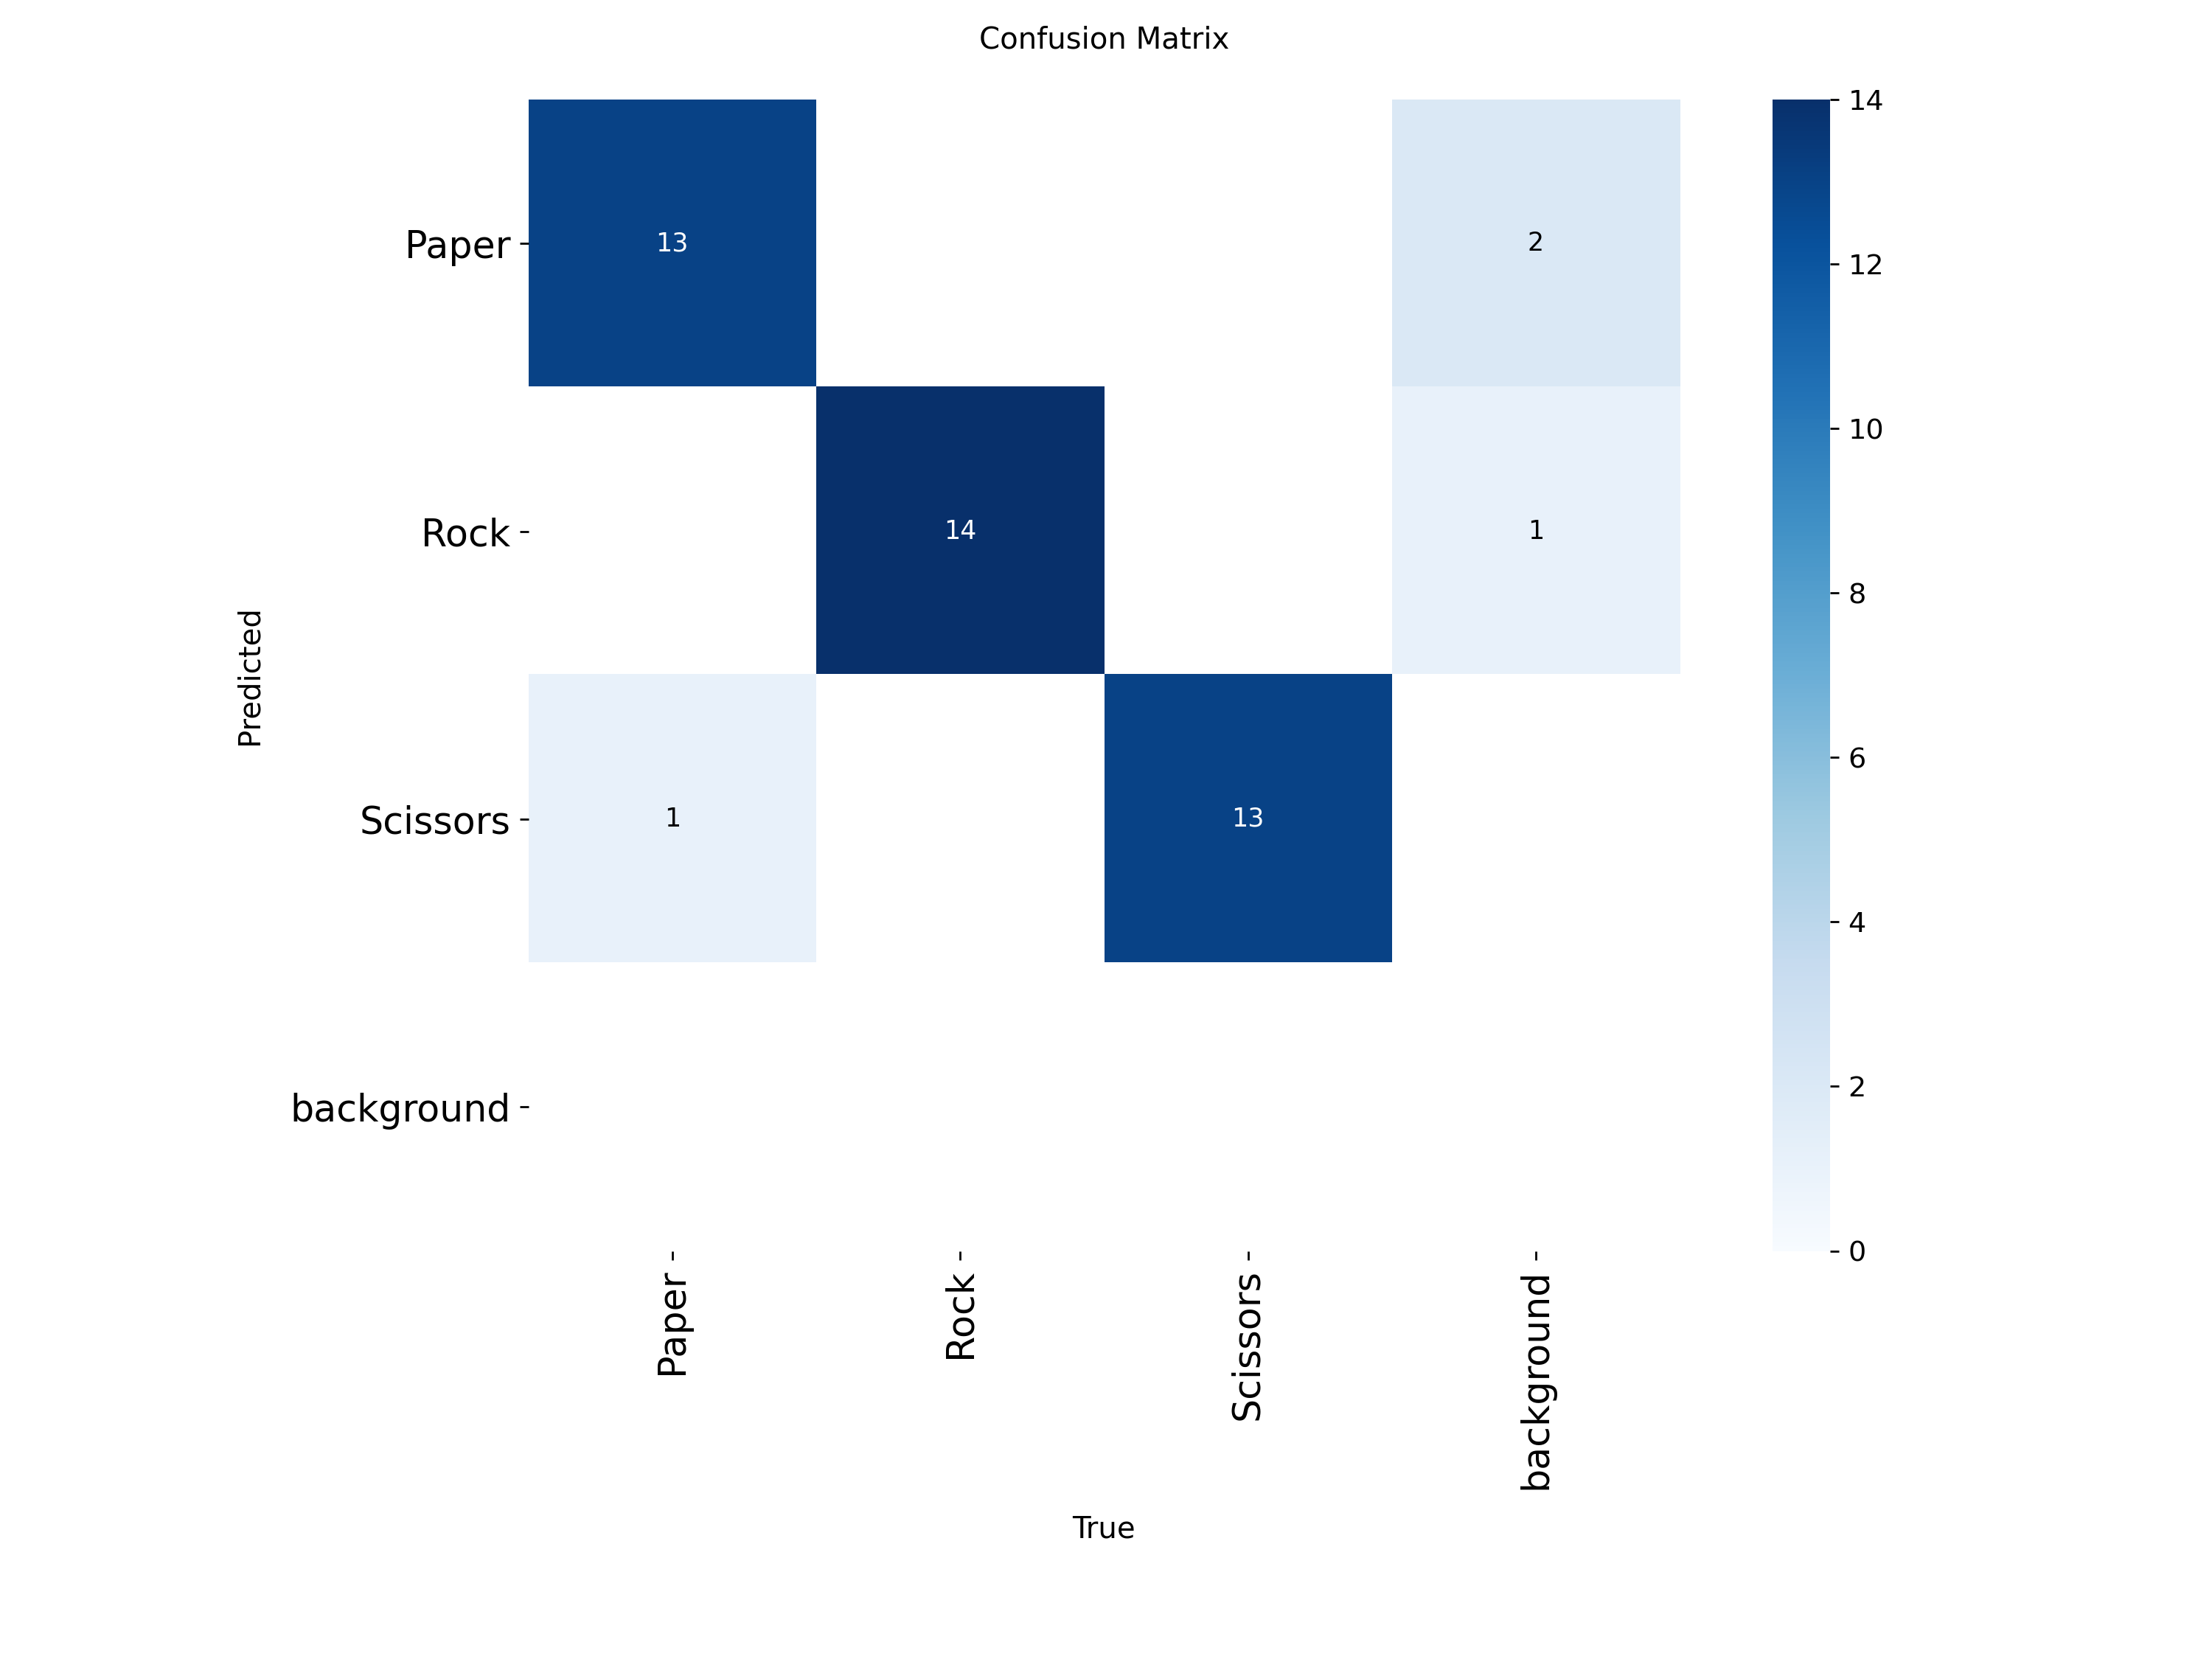

In [15]:
%cd {HOME}

# IMPORTANT:
# 1. task=obb (Dahil rotated boxes ang gamit natin)
# 2. model=yolo11n-obb.pt (Gamitin natin ang OBB version ng YOLO11)
# 3. imgsz=640 (Standard size, pwede mo ibalik sa 800 kung kaya ng GPU mo)

!yolo task=obb mode=train model=yolo11n-obb.pt data={dataset.location}/data.yaml epochs=5 imgsz=640 plots=True

%cd {HOME}

# Note: Ang results ng OBB ay napupunta sa runs/obb/train (hindi runs/detect)
from IPython.display import Image, display
display(Image(filename=f'{HOME}/runs/obb/train/confusion_matrix.png', width=800))

/content


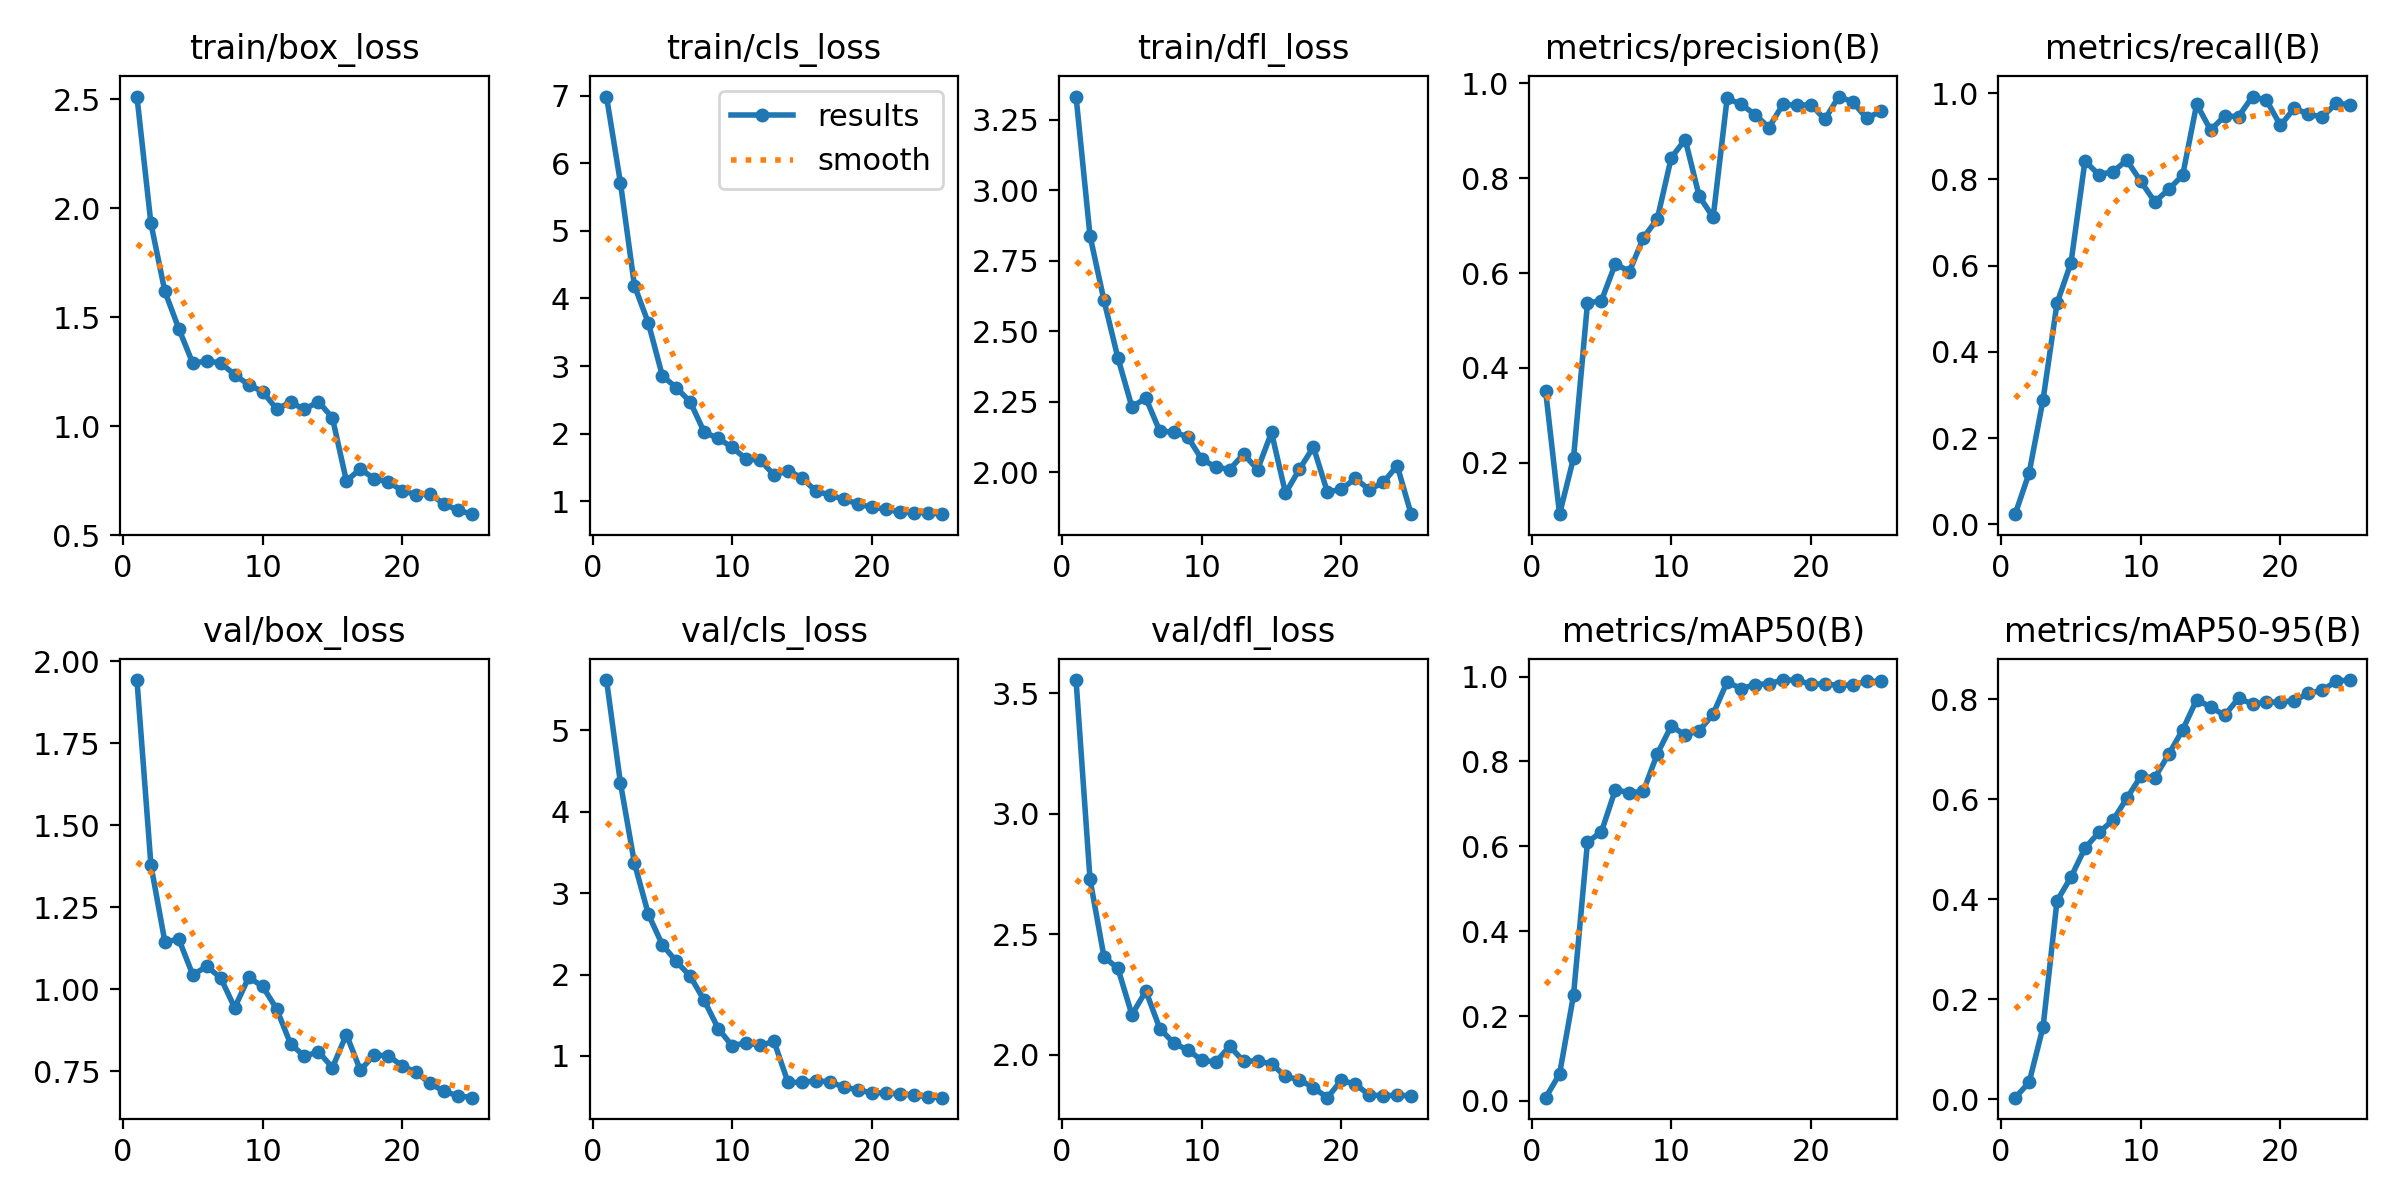

In [16]:
%cd {HOME}
from IPython.display import Image, display

# Pinalitan ko ang 'detect' ng 'obb' para mahanap niya yung tamang graph
display(Image(filename=f'{HOME}/runs/obb/train/results.png', width=800))

/content


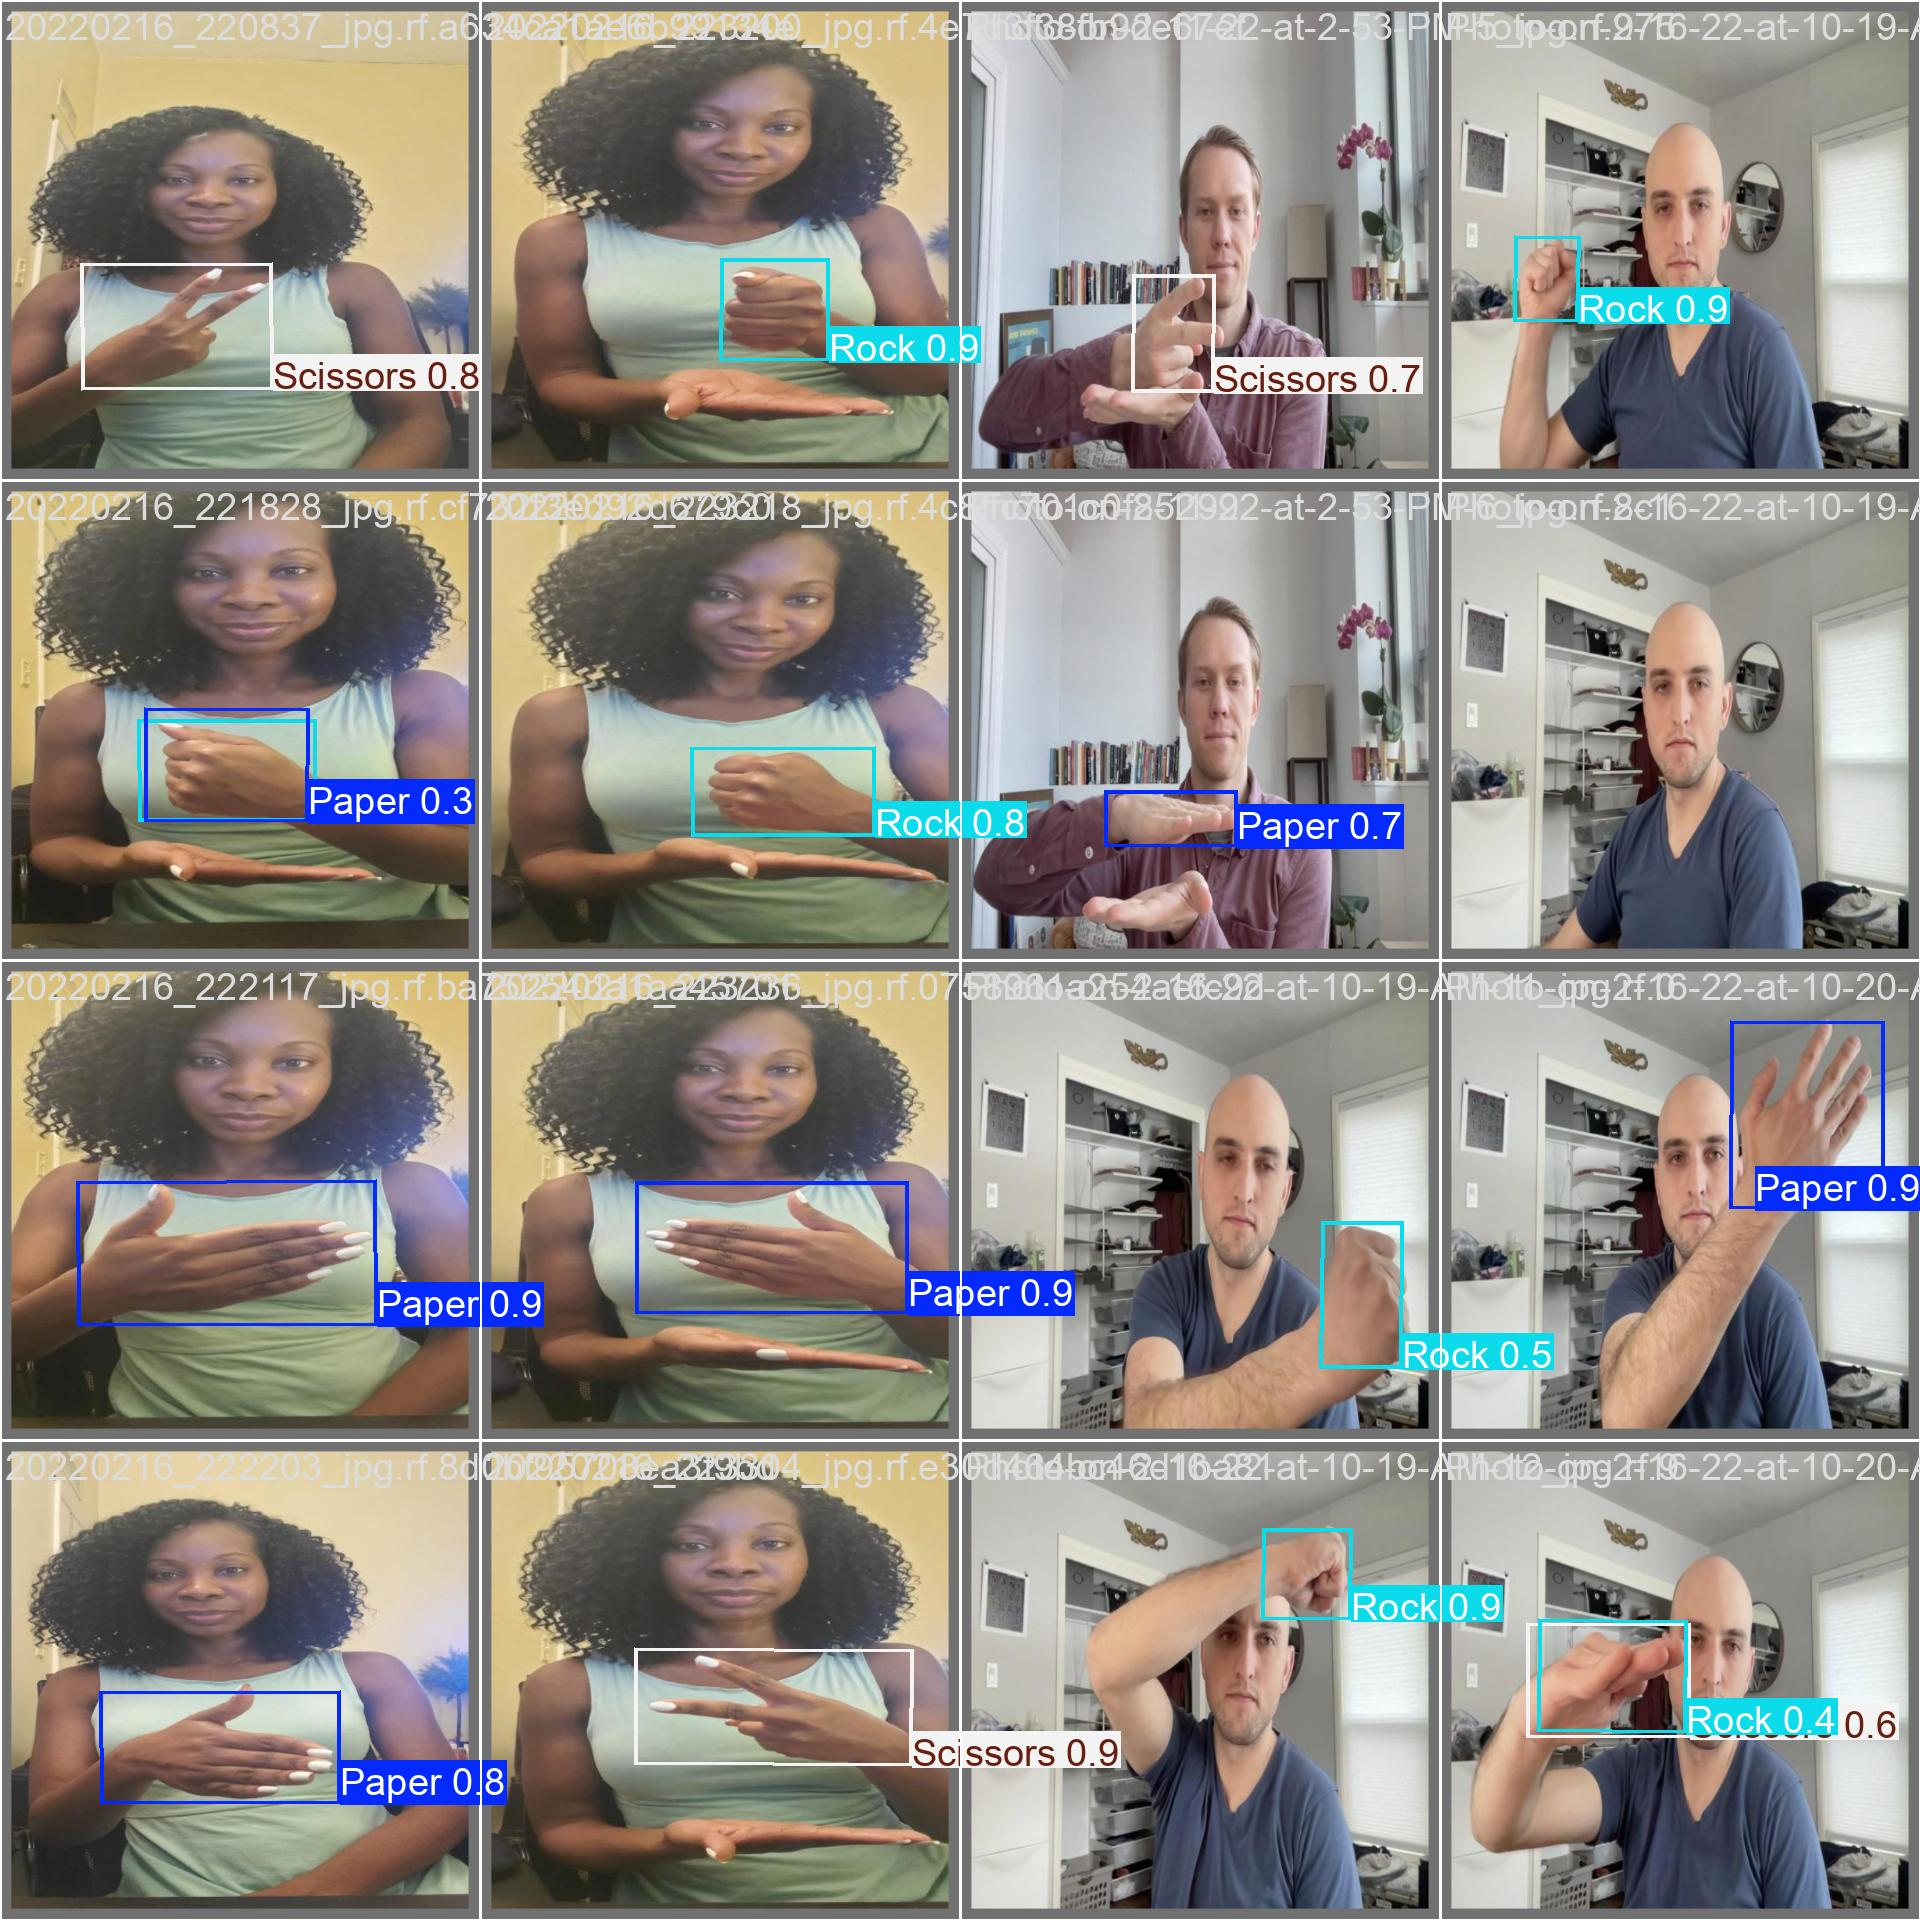

In [17]:
%cd {HOME}
from IPython.display import Image, display

# Pinalitan ang 'detect' -> 'obb' para mahanap ang tamang image
display(Image(filename=f'{HOME}/runs/obb/train/val_batch0_pred.jpg', width=800))

## Validate Custom Model

In [18]:
%cd {HOME}

# Pinalitan ang 'task=detect' -> 'task=obb'
# Pinalitan ang path mula 'runs/detect' -> 'runs/obb'
!yolo task=obb mode=val model={HOME}/runs/obb/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,654,308 parameters, 0 gradients, 6.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1168.8±230.2 MB/s, size: 27.5 KB)
val: Scanning /content/Rock-Paper-Scissors-Presentation-1/valid/labels.cache... 46 images, 5 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 46/46 846.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 2.0it/s 1.5s
                   all         46         41      0.942      0.972      0.989      0.839
                 Paper         14         14      0.924      0.929      0.977      0.819
                  Rock         14         14          1      0.986      0.995      0.831
              Scissors         13         13      0.901          1      0.995      0.867
Speed: 5.1ms preprocess, 9.4ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to 

## Inference with Custom Model

In [19]:
%cd {HOME}

# IMPORTANT CHANGES:
# 1. task=obb (Dahil rotated boxes ang gamit natin)
# 2. model path: pinalitan ng 'runs/obb/train/...'
!yolo task=obb mode=predict model={HOME}/runs/obb/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,654,308 parameters, 0 gradients, 6.6 GFLOPs

image 1/28 /content/Rock-Paper-Scissors-Presentation-1/test/images/20220216_221550_jpg.rf.4d7c8344f34c4deb9b62b5c193b54c2f.jpg: 640x640 1 Scissors, 10.6ms
image 2/28 /content/Rock-Paper-Scissors-Presentation-1/test/images/20220216_221819_jpg.rf.1309059f604cffe4f2627e4d35414968.jpg: 640x640 1 Rock, 8.6ms
image 3/28 /content/Rock-Paper-Scissors-Presentation-1/test/images/20220216_221856_jpg.rf.32e54fbe97a31c5aba236510a7bee16c.jpg: 640x640 1 Rock, 8.5ms
image 4/28 /content/Rock-Paper-Scissors-Presentation-1/test/images/20220216_222153_jpg.rf.046f93ec5c0b78b5f93ec1748054649d.jpg: 640x640 1 Paper, 1 Scissors, 10.3ms
image 5/28 /content/Rock-Paper-Scissors-Presentation-1/test/images/20220216_222607_jpg.rf.f7dbb3bb58d1209141a19ce46506c622.jpg: 640x640 1 Rock, 1 Scissors, 8.5ms
image 6/28 /content/Rock-Paper-Scissors